In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',100)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression


In [2]:
# importing data set 
train= pd.read_csv(r"C:\Users\USER\Desktop\AI\ML\EDA\HousePrices\train.csv")
test= pd.read_csv(r"C:\Users\USER\Desktop\AI\ML\EDA\HousePrices\test.csv")

In [3]:
# pivotal view  
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking rows and columns
train.shape

(1460, 81)

In [5]:
# Dropping ID column

train.drop(['Id'],axis=1,inplace= True)

In [6]:
# checking data again
# train.head()

In [7]:
# checking NULL values
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
# Finding Null Columns
for feature in train.columns:
    if train[feature].isnull().sum()>0:
        print(feature)


LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [9]:
# Finding NULL value columns using List comprehension

nullCols= [feature for feature in train.columns if train[feature].isnull().sum()>0]
nullCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
# single line code

nullCols= [feature for feature in train.columns if train[feature].isnull().sum()>0]
nullCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
# finding % of missing values of each category 

# 1.finding total rows of train dataset

train.shape[0]

trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount = train.isnull().sum()
pd.DataFrame([trainNullCount,trainNullPer])
trainNullDF= pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']  #adding column name
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF

,index,NullValues,NullPercentage
0,PoolQC,1453.0,99.52
1,MiscFeature,1406.0,96.30
2,Alley,1369.0,93.77
3,Fence,1179.0,80.75
4,FireplaceQu,690.0,47.26
5,LotFrontage,259.0,17.74
6,GarageYrBlt,81.0,5.55
7,GarageCond,81.0,5.55
8,GarageType,81.0,5.55
9,GarageFinish,81.0,5.55


In [12]:
# dropping columns with more than 40% null values

train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace= True)

In [13]:
# diving each null value total with total row count of train data set

trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))

# Rounding the values using np.round function
trainNullCount = train.isnull().sum()

In [14]:
pd.DataFrame([trainNullCount,trainNullPer])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,259.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,17.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# transposing the value for readability

trainNullDF= pd.DataFrame([trainNullCount,trainNullPer]).T

trainNullDF.columns=['NullValues','NullPercentage']  #adding column name

trainNullDF

,NullValues,NullPercentage
MSSubClass,0.0,0.00
MSZoning,0.0,0.00
LotFrontage,259.0,17.74
LotArea,0.0,0.00
Street,0.0,0.00
LotShape,0.0,0.00
LandContour,0.0,0.00
Utilities,0.0,0.00
LotConfig,0.0,0.00
LandSlope,0.0,0.00


In [16]:
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)

In [17]:
trainNullDF.reset_index(inplace=True)

In [18]:
trainNullDF

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [19]:
# finding the columns with null values and saving it as array
nullColumns= np.array(trainNullDF[:14]["index"])
nullColumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [20]:
# finding datatypes of columns with null values.

for column in nullColumns:
    if train[column].dtype=="object":
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f"{column} is numerical.")
        train[column].fillna(train[column].median(),inplace=True)




LotFrontage is numerical.
GarageType
GarageYrBlt is numerical.
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea is numerical.
MasVnrType
Electrical


In [21]:
trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount = train.isnull().sum()
pd.DataFrame([trainNullCount,trainNullPer])
trainNullDF= pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']  #adding column name
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF

,index,NullValues,NullPercentage
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [22]:
# Displaying columns all that is numerical
numericalColumns= train.select_dtypes(include=np.number).columns
numericalColumns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
# Displaying columns all that is object type
objectColumns= train.select_dtypes(include=np.object).columns
objectColumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

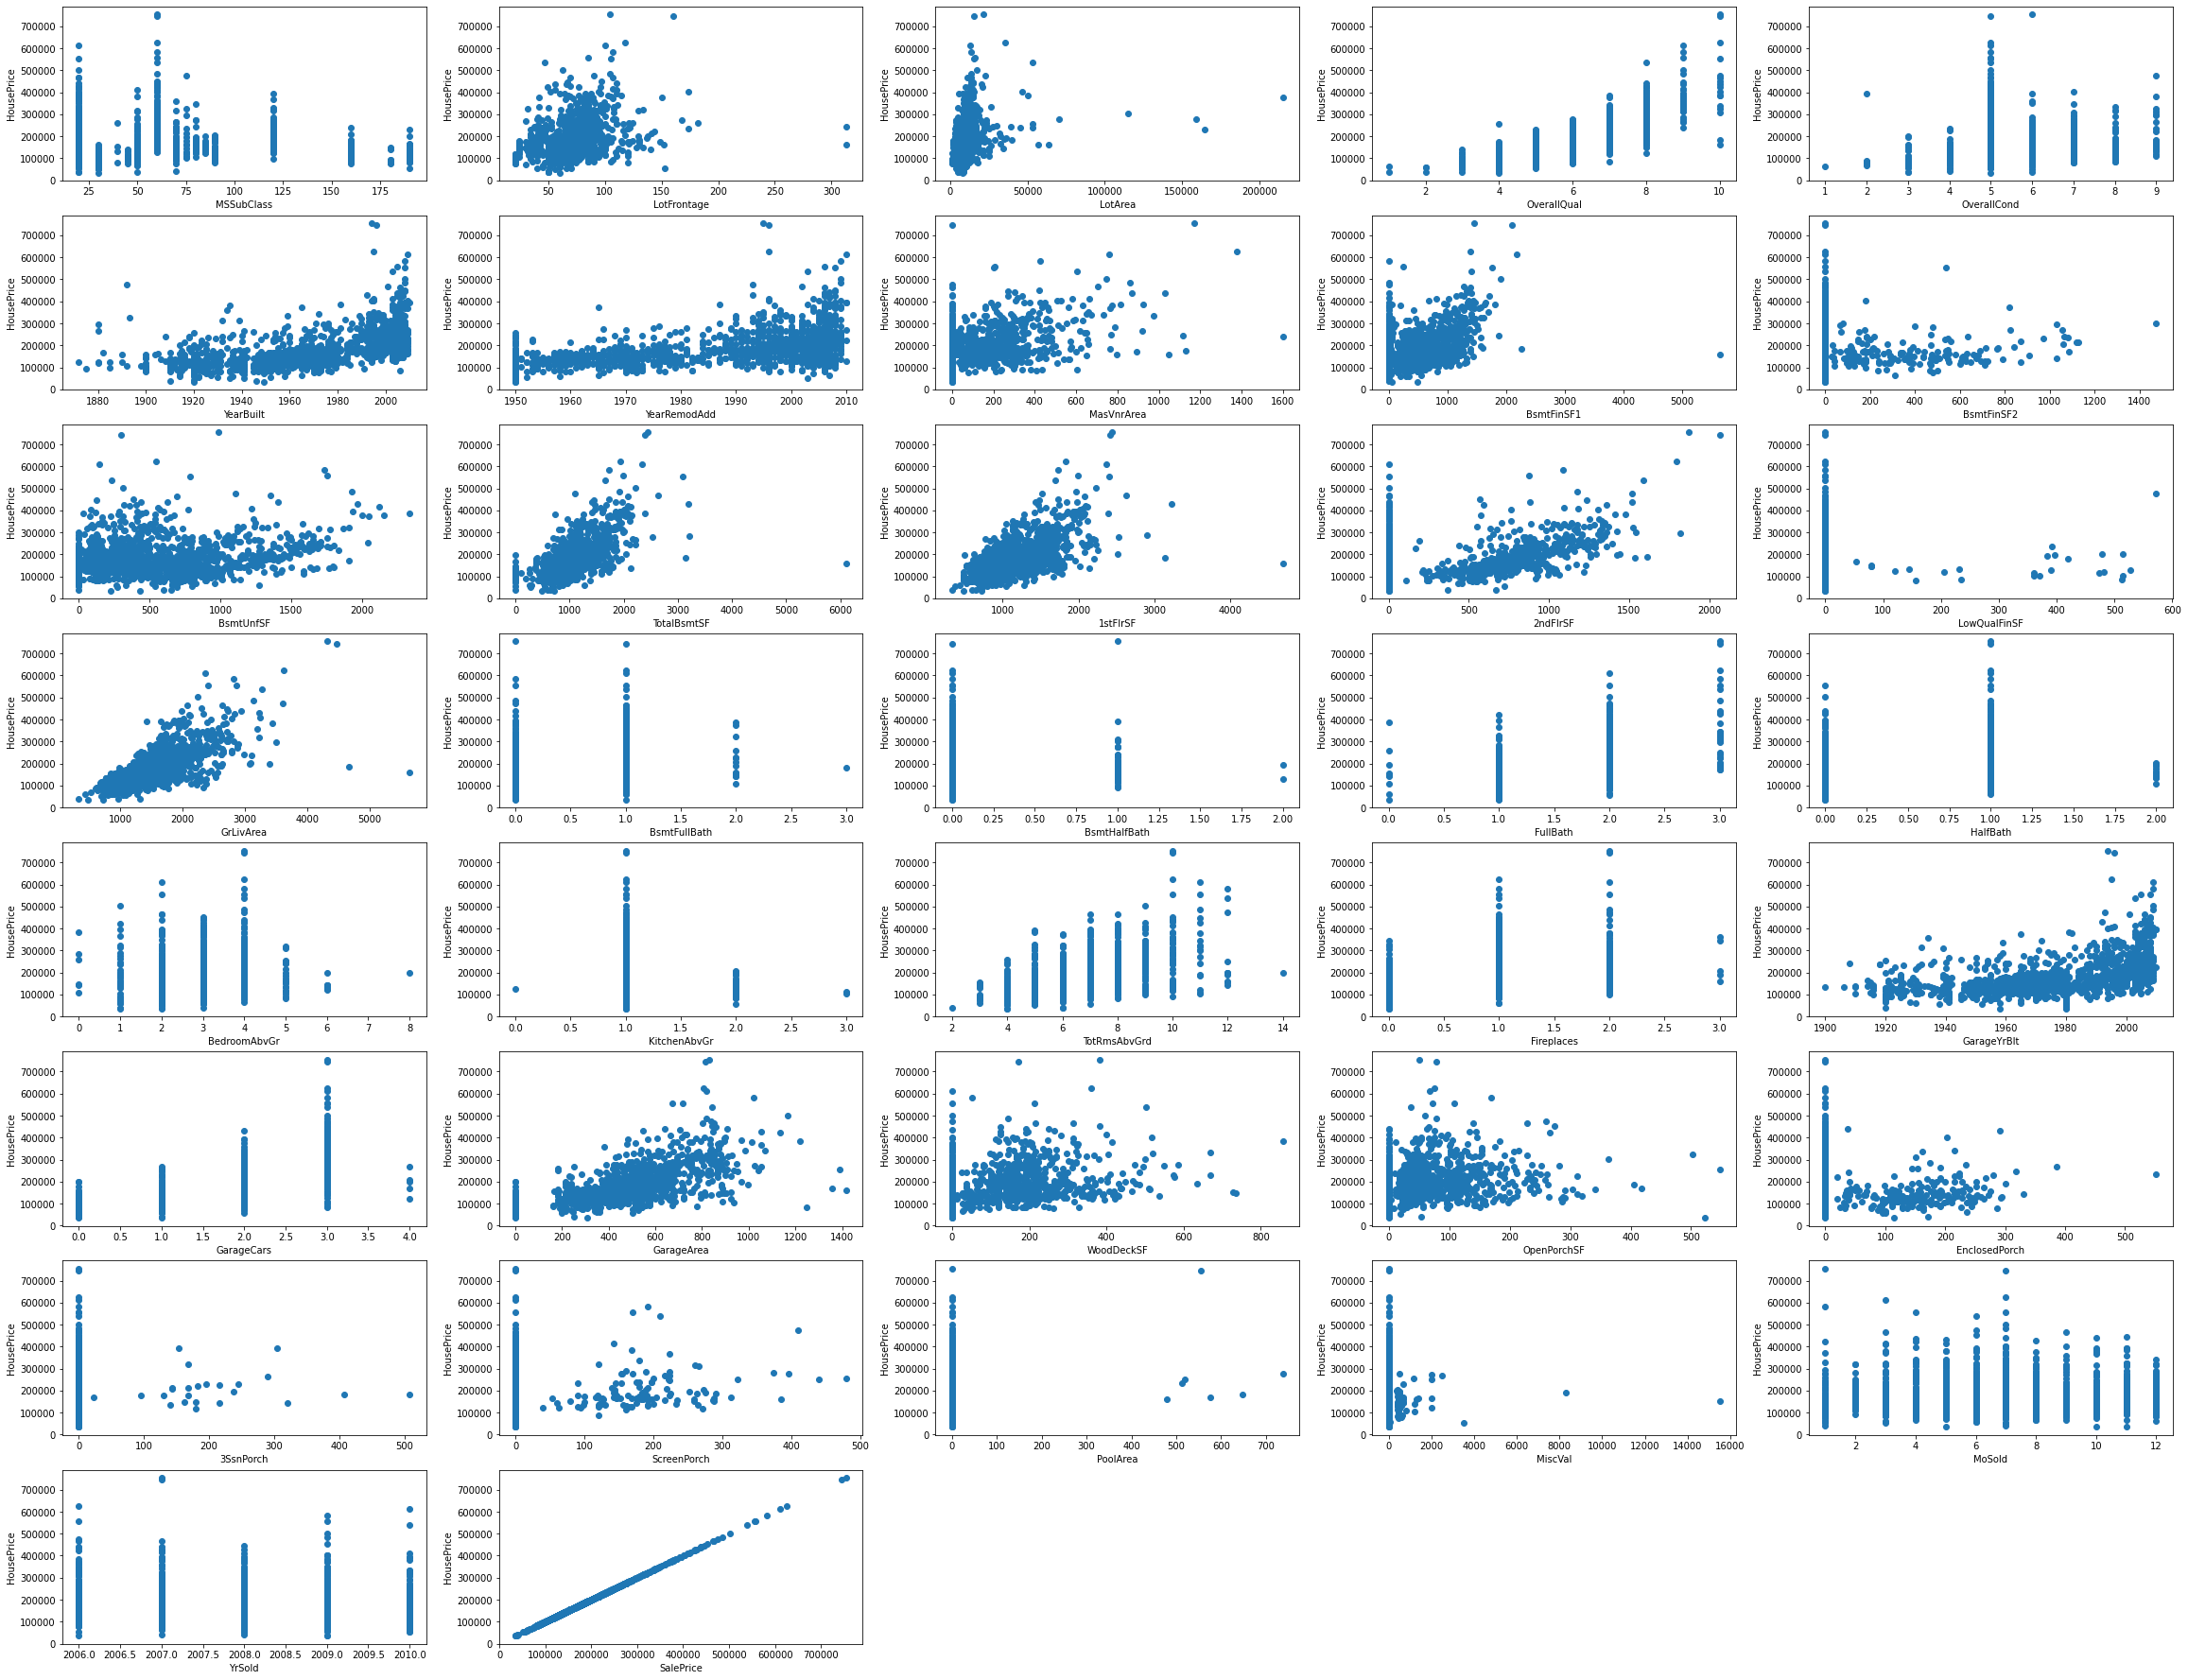

In [24]:
# Visualization of numericalColumns
j=0
plt.figure(figsize=(40,40))

for column in numericalColumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [25]:
descreteCol=[]
continuousCol=[]
for column in numericalColumns:
    if train[column].nunique()>20:
        continuousCol.append(column)
    else:
        descreteCol.append(column)

In [26]:
continuousCol

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

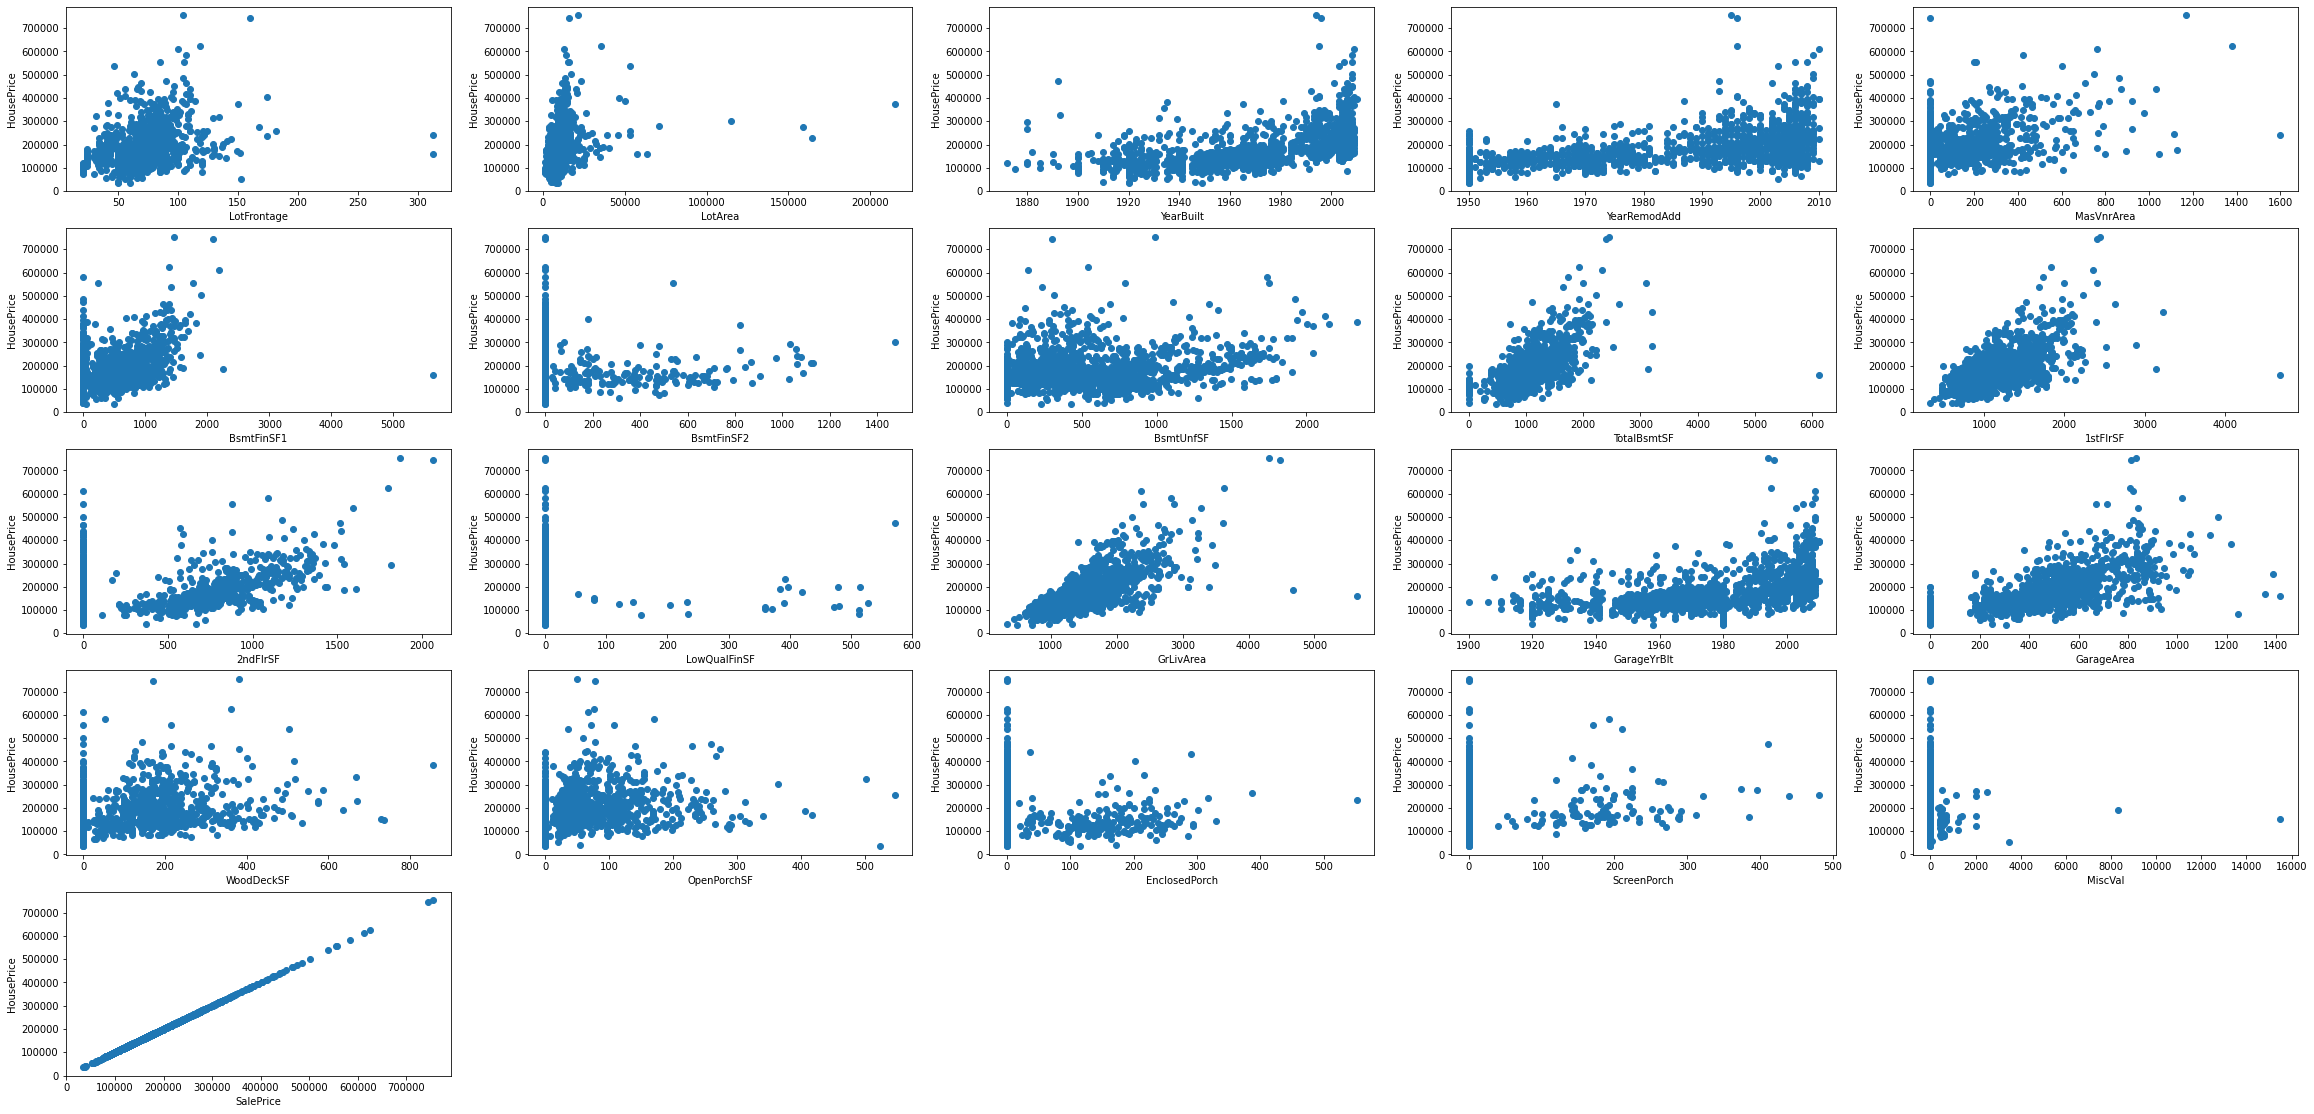

In [27]:
# Visualization of numericalColumns
j=0
plt.figure(figsize=(40,40))

for column in continuousCol:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [29]:
observationVal= train.groupby('MSSubClass')['SalePrice'].mean() #finding the average of each category in Mssubclass
observationValDF = pd.DataFrame(observationVal).sort_values(by='SalePrice',ascending=False)
observationValDF.reset_index(inplace=True)

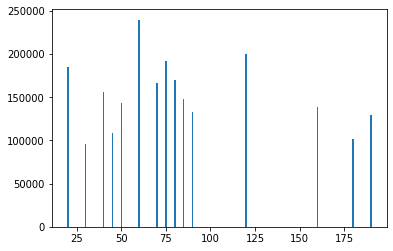

In [30]:
plt.bar(observationValDF['MSSubClass'],observationValDF['SalePrice'])
plt.show()

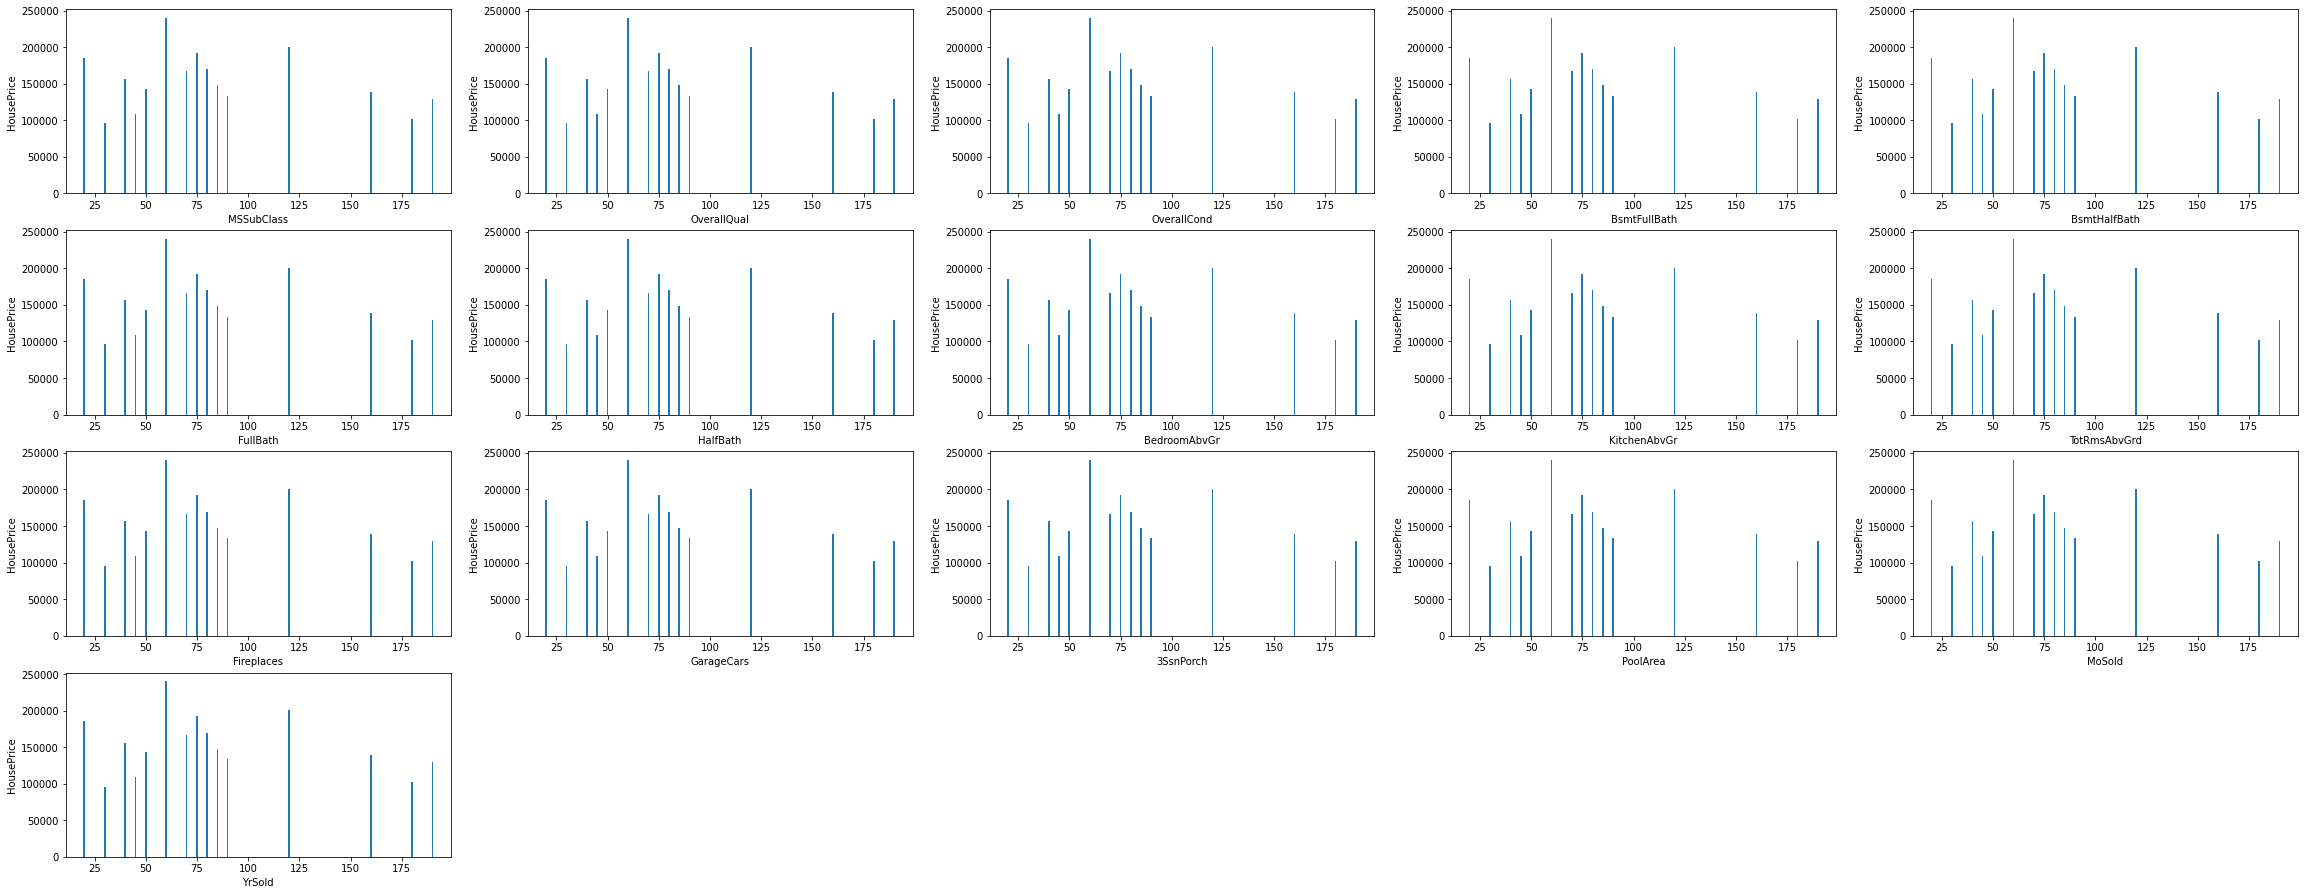

In [31]:
# Visualization of descrete columns
j=0
plt.figure(figsize=(40,40)) #creating a plot of 40rows X 40 Cols

for column in descreteCol:
    plt.subplot(10,5,j+1) #10rows X 5 Cols ,J+1 iteration
    observationVal= train.groupby('MSSubClass')['SalePrice'].mean()
    observationValDF = pd.DataFrame(observationVal).sort_values(by='SalePrice',ascending=False)
    observationValDF.reset_index(inplace=True)
    plt.bar(observationValDF['MSSubClass'],observationValDF['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1


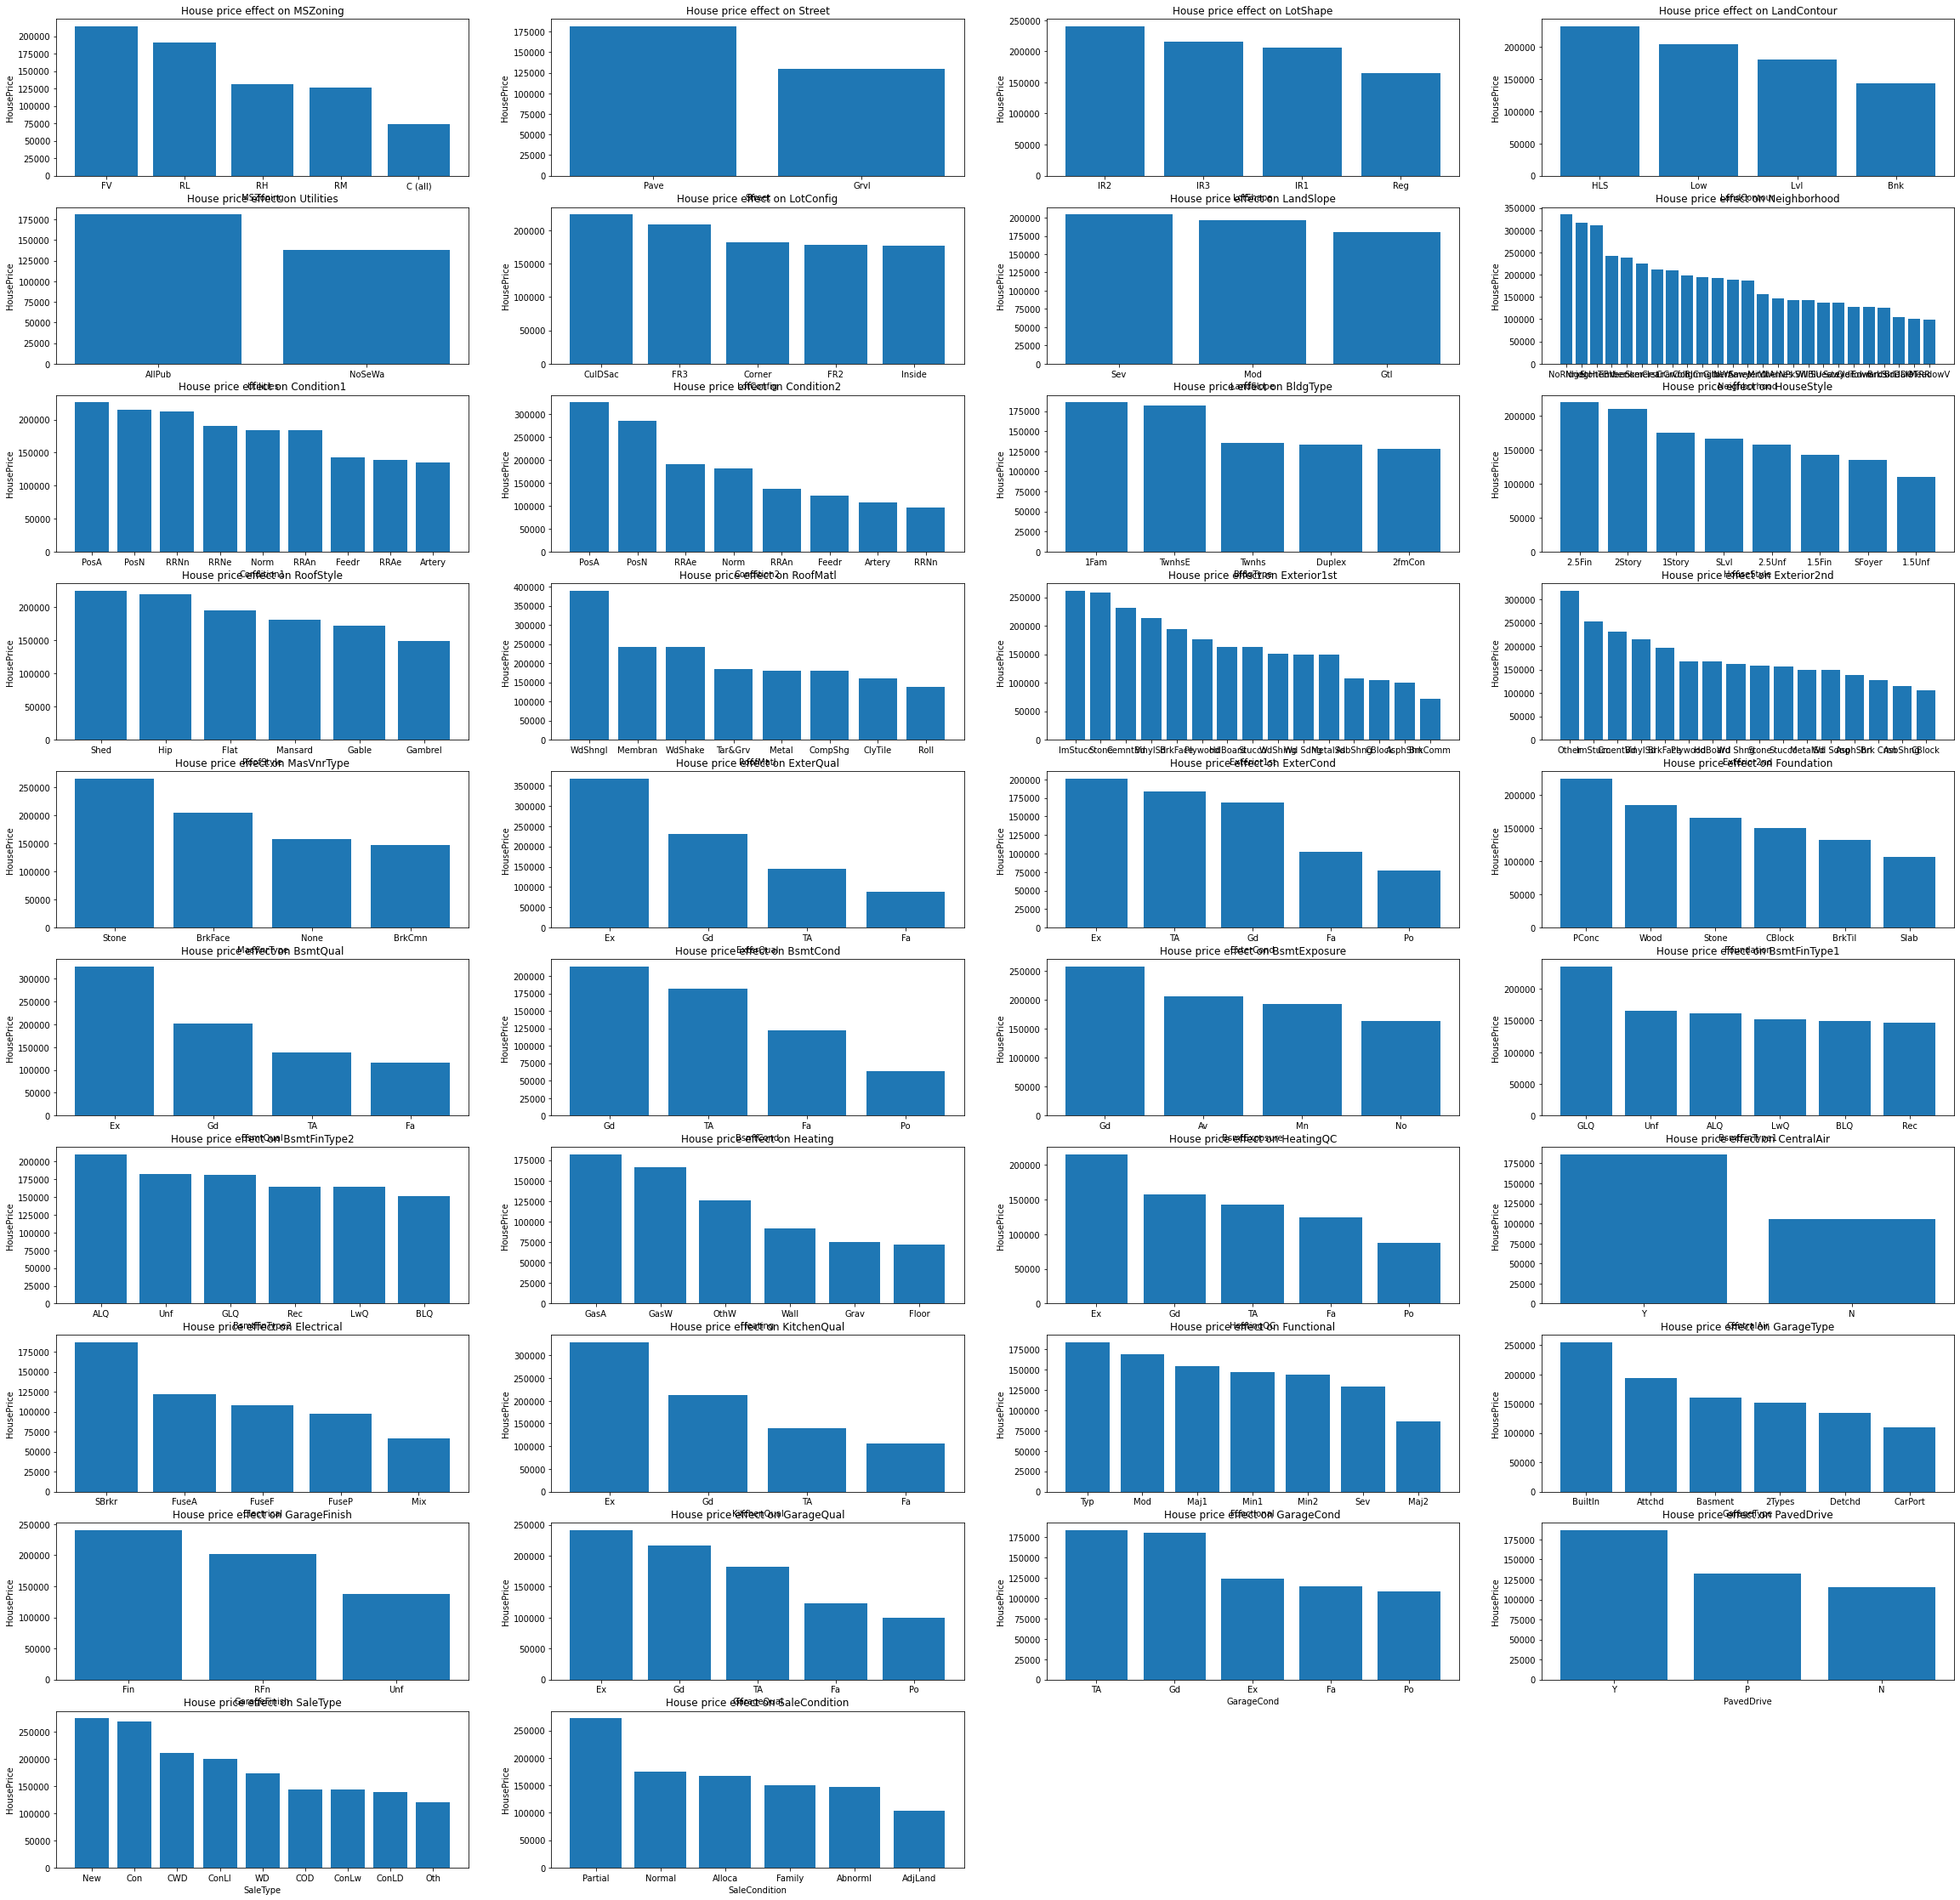

In [32]:
# Visualization of descrete columns
j=0
plt.figure(figsize=(40,40)) #creating a plot of 40rows X 40 Cols

for column in objectColumns:
    plt.subplot(10,4,j+1) #10rows X 4 Cols ,J+1 iteration
    observationVal= train.groupby(column)['SalePrice'].mean()
    observationValDF = pd.DataFrame(observationVal).sort_values(by='SalePrice',ascending=False)
    observationValDF.reset_index(inplace=True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"House price effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1


In [33]:
# handling outliers

In [34]:
continuousCol

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [35]:

upperLimit = train['LotFrontage'].mean()+ train['LotFrontage'].std()*3
lowerLimit= train['LotFrontage'].mean()- train['LotFrontage'].std()*3

In [36]:
#Capping


In [37]:
train.loc[(train['LotFrontage']>upperLimit),'LotFrontage']= upperLimit
train.loc[(train['LotFrontage']<lowerLimit),'LotFrontage']= lowerLimit


In [38]:
# function to cap upper and lower limit

for column in continuousCol:

    upperLimit = train[column].mean()+ train[column].std()*3
    lowerLimit= train[column].mean()- train[column].std()*3
    train.loc[(train[column]>upperLimit),column]= upperLimit
    train.loc[(train[column]<lowerLimit),column]= lowerLimit



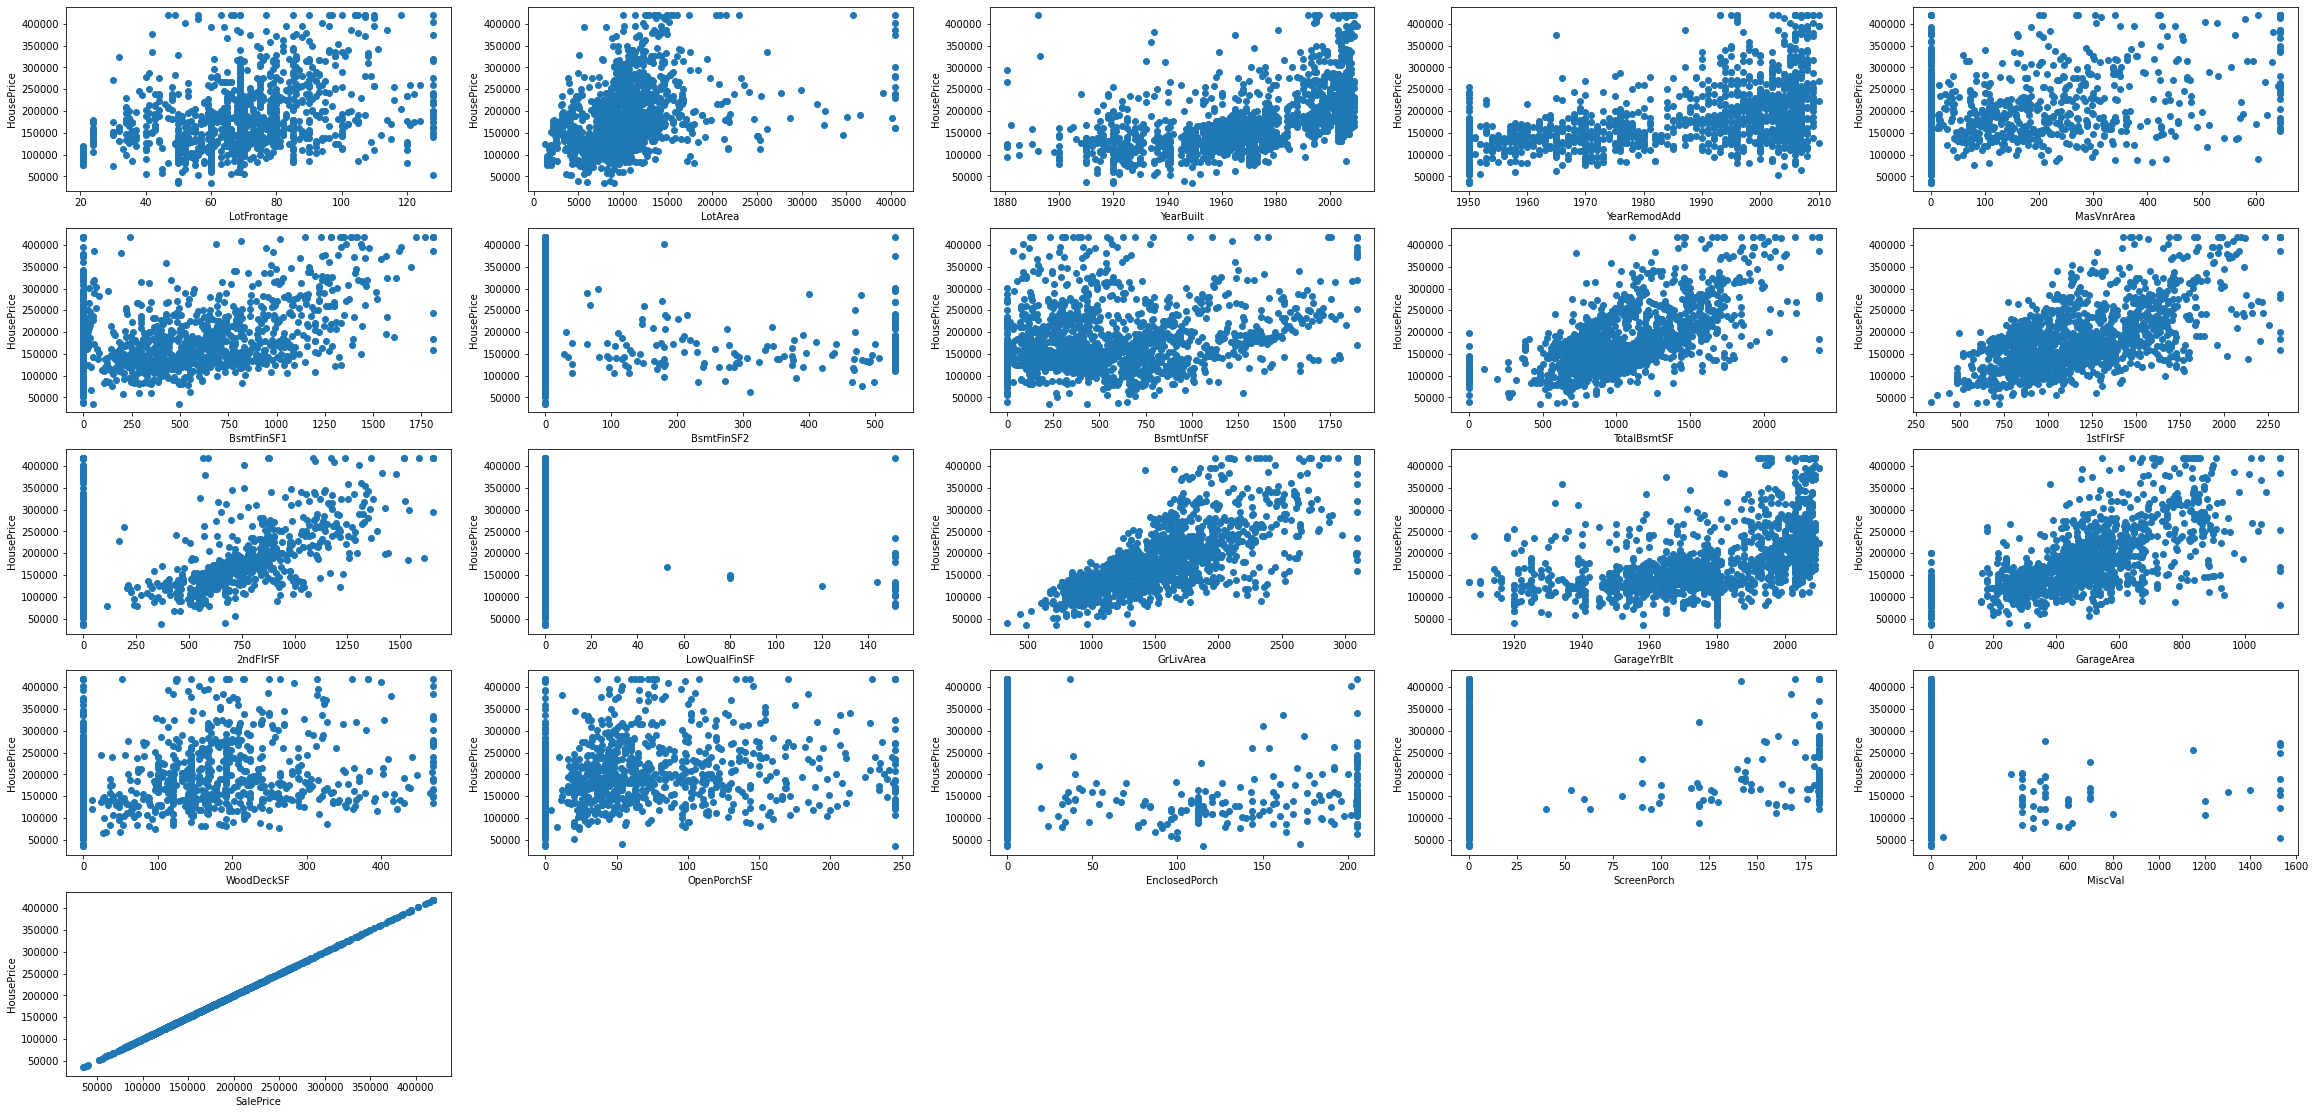

In [39]:
# Visualization of numericalColumns
j=0
plt.figure(figsize=(40,40))

for column in continuousCol:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1


In [40]:
trainObjectDF =train[objectColumns]

In [41]:
from collections import defaultdict
defaultEncoder= defaultdict(LabelEncoder)

# variable encoding

fittrainObjectDF= trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))


In [42]:
fittrainObjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [43]:
train.drop(objectColumns,axis=1,inplace=True)

In [44]:
updatedTrain= pd.concat([train,fittrainObjectDF],axis=1) #concating object columns of train with fittrainObjectDF for numerical conversion.

In [45]:
updatedTrain

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.000000,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.000000,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,6,5,1999.0,2000.0,0.0,0.0,0.000000,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175.0,6,6,1978.0,1988.0,119.0,790.0,163.000000,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042.0,7,9,1941.0,2006.0,0.0,275.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717.0,5,6,1950.0,1996.0,0.0,49.0,530.507133,...,0,2,6,1,2,4,4,2,8,4


In [46]:
corrDF= updatedTrain.corr() #correlation
# corrDF 

In [47]:
# correlated columns
corrColumns= abs(corrDF['SalePrice']).sort_values(ascending=False)

In [48]:
finalColumns= corrColumns[corrColumns>0.4].index

In [49]:
finalColumns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [50]:
finalDF= updatedTrain[finalColumns]

In [51]:
finalDF.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [52]:
y=finalDF['SalePrice']

In [53]:
x=finalDF.drop(['SalePrice'],axis=1)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=42) #.70 data will be used for training

In [55]:
sc_X= StandardScaler()
X_train=pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(sc_X.transform(X_test),columns=X_test.columns)

# sc_X= StandardScaler()
# sc_X.fit_transform(X_train) # Fit transform X_train
# X_train= pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns) #converting Numpy array into Columns
# X_test= pd.DataFrame(sc_X.transform(X_test),columns=X_test.columns) #converting Numpy array into Columnssc_y= StandardScaler()

sc_y= StandardScaler()
y_train= pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1))) 
y_test= pd.DataFrame(sc_y.transform(np.array(y_test).reshape(-1,1))) 




In [56]:
sc_X.var_

array([1.87887320e+00, 2.44348028e+05, 5.33473945e-01, 4.27274914e+04,
       1.67746051e+05, 4.73023043e-01, 1.33558857e+05, 7.55455325e-01,
       6.66108815e-01, 2.96082085e-01, 6.65385013e-01, 9.42609476e+02,
       4.30021350e+02, 2.65501913e+00, 5.81656620e+02, 4.23027064e-01,
       2.57504292e+04, 2.99304154e+00, 5.42729233e-01])

In [57]:
lr= LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [58]:
y_pred=lr.predict(X_test)


In [59]:
len(y_pred)

438

In [60]:
len(X_train)

1022

In [61]:
len(y_test)

438

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.13177062282871563

In [63]:
# train accuracy
lr.score(X_train,y_train)

0.8388018191584644

In [64]:
# test accuracy

lr.score(X_test,y_test)

0.8772740901784777

In [65]:
# if test accuracy > train accuracy; is called optimal model 
# else over fitting 

In [66]:
sc_y= StandardScaler()

y_train= pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1))) 
y_test= pd.DataFrame(sc_y.transform(np.array(y_train).reshape(-1,1))) 

In [67]:
# lr_scaled= LinearRegression()
# lr_scaled.fit(X_train,y_train)

In [68]:
# y_scaled_pred=lr_scaled.predict(X_test)

In [69]:
X_train.shape

(1022, 19)

In [70]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test,y_scaled_pred)

In [71]:
X_train.columns[:4].to_list()

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [72]:
r2_score=[]
adjusted_r2=[]
feature_names=[]

for i in range(1,20):
    feature_names.append(X_train.columns[:i].to_list())
    lr =LinearRegression()
    lr.fit(X_train[X_train.columns[:i]],y_train)
    R2=lr.score(X_test[X_test.columns[:i]],y_test)
    r2_score.append(R2)

    n=len(X_train)
    p=i
    adjR2=1-((1-R2) * (n-1)/(n-p-1)) 
    adjusted_r2.append(adjR2)

ValueError: Found input variables with inconsistent numbers of samples: [1022, 438]

P Value

In [ ]:
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train)
FinalInfo = mod.fit()
FinalInfo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      0   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              274.7
Date:                Sun, 29 May 2022   Prob (F-statistic):                        0.00
Time:                        23:31:48   Log-Likelihood:                         -517.52
No. Observations:                1022   AIC:                                      1073.
Df Residuals:                    1003   BIC:                                      1167.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.1970      0.023      8.692      0.000       0.153       0.242
GrLivArea        0.3596      0.030     11.901      0.000       0.300       0.419
GarageCars       0.0632      0.030      2.140      0.033       0.005       0.121
GarageArea       0.0642      0.029      2.223      0.026       0.008       0.121
TotalBsmtSF      0.1172      0.025      4.765      0.000       0.069       0.165
ExterQual       -0.0423      0.019     -2.184      0.029      -0.080      -0.004
1stFlrSF         0.0428      0.024      1.785      0.075      -0.004       0.090
BsmtQual        -0.1081      0.017     -6.195      0.000      -0.142      -0.074
KitchenQual     -0.0891      0.018     -5.034      0.000      -0.124      -0.054
FullBath        -0.0661      0.019     -3.435      0.001      -0.104      -0.028
GarageFinish    -0.0253      0.017     -1.478      0.140      -0.059       0.008
YearBuilt        0.1084      0.027      4.052      0.000       0.056       0.161
YearRemodAdd     0.0741      0.019      3.957      0.000       0.037       0.111
TotRmsAbvGrd    -0.0358      0.024     -1.494      0.135      -0.083       0.011
GarageYrBlt     -0.0333      0.022     -1.480      0.139      -0.077       0.011
Fireplaces       0.0861      0.016      5.513      0.000       0.055       0.117
MasVnrArea       0.0181      0.015      1.215      0.225      -0.011       0.047
HeatingQC       -0.0133      0.016     -0.848      0.397      -0.044       0.018
Foundation       0.0084      0.017      0.482      0.630      -0.026       0.042
==============================================================================
Omnibus:                      335.005   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8317.054
Skew:                          -0.924   Prob(JB):                         0.00
Kurtosis:                      16.853   Cond. No.                         9.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# pip install statsmodels

In [ ]:
# pip install --upgrade --no-deps statsmodels

In [ ]:
# pip install --user "downloaded_package_path"

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement downloaded_package_path (from versions: none)
ERROR: No matching distribution found for downloaded_package_path
You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
FinalInfo.summary2().tables[1]["P>|t|"]

OverallQual     1.432407e-17
GrLivArea       1.205731e-30
GarageCars      3.259897e-02
GarageArea      2.645652e-02
TotalBsmtSF     2.166584e-06
ExterQual       2.919688e-02
1stFlrSF        7.460324e-02
BsmtQual        8.472109e-10
KitchenQual     5.679465e-07
FullBath        6.175598e-04
GarageFinish    1.396646e-01
YearBuilt       5.472808e-05
YearRemodAdd    8.109612e-05
TotRmsAbvGrd    1.354890e-01
GarageYrBlt     1.391856e-01
Fireplaces      4.488344e-08
MasVnrArea      2.246116e-01
HeatingQC       3.969137e-01
Foundation      6.295755e-01
Name: P>|t|, dtype: float64

In [ ]:
finalSum = FinalInfo.summary2().tables[1]["P>|t|"]

In [ ]:
finalSum[finalSum<=0.05]

OverallQual     1.432407e-17
GrLivArea       1.205731e-30
GarageCars      3.259897e-02
GarageArea      2.645652e-02
TotalBsmtSF     2.166584e-06
ExterQual       2.919688e-02
BsmtQual        8.472109e-10
KitchenQual     5.679465e-07
FullBath        6.175598e-04
YearBuilt       5.472808e-05
YearRemodAdd    8.109612e-05
Fireplaces      4.488344e-08
Name: P>|t|, dtype: float64